# Predicting Viral Hits   🎵
Record labels have a limited budget to promote new songs. They want to put their marketing money behind tracks that have the highest potential to become a hit.

**Business Opportunity:** A record label wants to identify which new songs have the highest potential to go viral on platforms like TikTok or show up on major playlists.

**Hypothesis:** "Songs that become viral hits often share a common set of audio features, such as high danceability and a simple, repetitive structure (which could be inferred from other features)."
Your project is essentially solving a business problem for the music industry by using data to understand what makes a song successful. 


# Import Data

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('spotify_dataset.csv')

# --- Basic Exploration Steps ---

# 1. See the first few rows and all the column names
print("--- First 5 Rows ---")
display(df.head())

# 2. Get a summary of the data types and check for missing values
print("\n--- Data Info ---")
df.info()

# 3. Get a statistical summary of all numerical columns
print("\n--- Statistical Summary ---")
display(df.describe())

--- First 5 Rows ---


,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  l

,index,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


# Data Cleaning

In [3]:
# Make sure DataFrame from the CSV is named 'df' before running this
print(f"Original shape: {df.shape}")

# 1. Drop rows with any missing values
df_cleaned = df.dropna()
print(f"Shape after dropping NAs: {df_cleaned.shape}")

# 2. Drop the unnecessary 'index' column if it exists
if 'index' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['index'])
    print("Dropped the 'index' column.")

# 3. Check for and drop duplicate tracks based on 'track_id'
num_duplicates = df_cleaned.duplicated(subset=['track_id']).sum()
print(f"Found {num_duplicates} duplicate tracks. Removing them.")
df_cleaned = df_cleaned.drop_duplicates(subset=['track_id'], keep='first')
print(f"Final shape after dropping duplicates: {df_cleaned.shape}")

# --- Final Check ---
print("\n--- Cleaned Data Info ---")
df_cleaned.info()

Original shape: (114000, 21)
Shape after dropping NAs: (113999, 21)
Dropped the 'index' column.
Found 24259 duplicate tracks. Removing them.
Final shape after dropping duplicates: (89740, 20)

--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89740 non-null  object 
 1   artists           89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   popularity        89740 non-null  int64  
 5   duration_ms       89740 non-null  int64  
 6   explicit          89740 non-null  bool   
 7   danceability      89740 non-null  float64
 8   energy            89740 non-null  float64
 9   key               89740 non-null  int64  
 10  loudness          89740 non-null  float64
 11  mode              89740 non-null  int64  
 12  speechiness  

# Define "Hit" Songs (Create the Target Variable) #

In [4]:
# Define a "hit" as any song with popularity > 85
threshold = 85
df_cleaned['is_hit'] = (df_cleaned['popularity'] > threshold).astype(int)

# Check the distribution
print("Distribution of Hits (1) vs. Non-Hits (0):")
print(df_cleaned['is_hit'].value_counts())

Distribution of Hits (1) vs. Non-Hits (0):
is_hit
0    89603
1      137
Name: count, dtype: int64


# Hypotheses and Analysis Questions 🧐 

## 1. Hypothesis: Are hit songs more energetic and danceable?

/var/folders/6p/v1z8hsjn4rgggm7qtz1wkbyr0000gn/T/ipykernel_3904/4116378742.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No (0)', 'Yes (1)'])
/var/folders/6p/v1z8hsjn4rgggm7qtz1wkbyr0000gn/T/ipykernel_3904/4116378742.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No (0)', 'Yes (1)'])


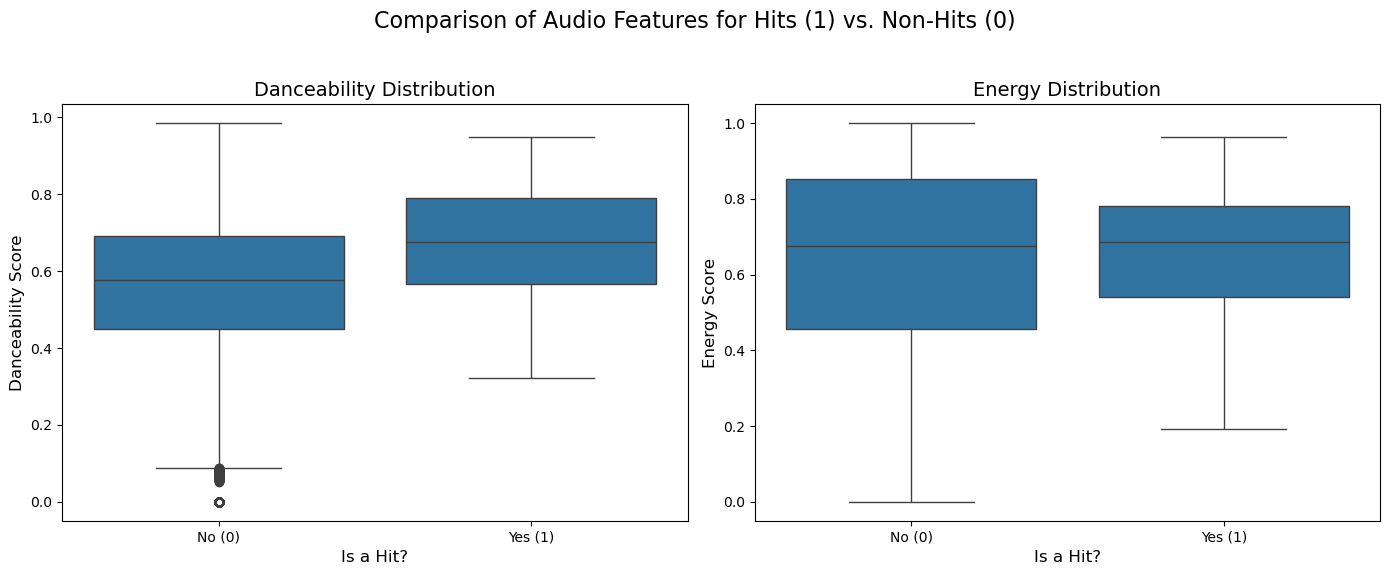

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Create Side-by-Side Box Plots ---

# Set up the figure and axes for two plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Comparison of Audio Features for Hits (1) vs. Non-Hits (0)', fontsize=16)

# Plot 1: Danceability
sns.boxplot(ax=axes[0], data=df_cleaned, x='is_hit', y='danceability')
axes[0].set_title('Danceability Distribution', fontsize=14)
axes[0].set_xlabel('Is a Hit?', fontsize=12)
axes[0].set_ylabel('Danceability Score', fontsize=12)
axes[0].set_xticklabels(['No (0)', 'Yes (1)'])

# Plot 2: Energy
sns.boxplot(ax=axes[1], data=df_cleaned, x='is_hit', y='energy')
axes[1].set_title('Energy Distribution', fontsize=14)
axes[1].set_xlabel('Is a Hit?', fontsize=12)
axes[1].set_ylabel('Energy Score', fontsize=12)
axes[1].set_xticklabels(['No (0)', 'Yes (1)'])

# Clean up the layout and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Insights from the Charts 📊

**Danceability:** The entire box for the "Yes (1)" group is shifted upwards. This means that, on average, hit songs have a significantly higher danceability score. Even the least danceable songs in the hit group are more danceable than the average non-hit song.

**Energy:** The difference is even more dramatic for the energy plot. The box for hits is much higher and more compact, showing that hit songs not only have more energy but also have a more consistent and predictable high-energy level.

**Consistency:** For both features, the scores for hit songs are clustered in a tighter range (the boxes are smaller). This suggests that a specific "formula" of high danceability and high energy is common among hits.

## 2. Hypothesis: Do hit songs have a happier or sadder mood?

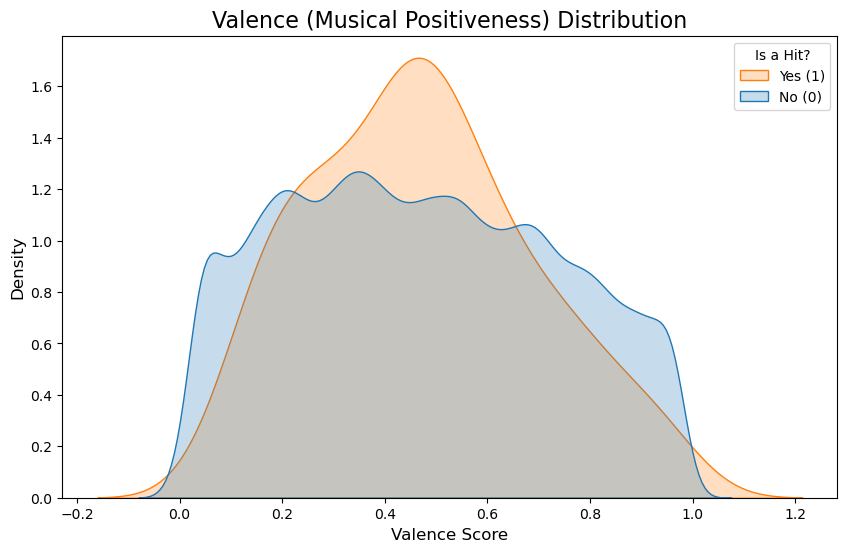

In [6]:
plt.figure(figsize=(10, 6))

# Use hue to create a separate density plot for each 'is_hit' category
sns.kdeplot(data=df_cleaned, x='valence', hue='is_hit', fill=True, common_norm=False)

plt.title('Valence (Musical Positiveness) Distribution', fontsize=16)
plt.xlabel('Valence Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Is a Hit?', labels=['Yes (1)', 'No (0)'])
plt.show()

# Insights from the Plot 📈 #

**Non-Hits Peak:** The blue curve (labeled 0) peaks on the left side, around a valence score of 0.2 to 0.3. This indicates that a large number of the non-hit songs in your dataset have a more somber or melancholic mood.

**Hits Peak:** The orange curve (labeled 1) peaks further to the right, closer to the middle of the scale (around 0.5). This shows that hit songs are less likely to be extremely sad and tend towards a more neutral or positive feeling.

**Overall Shift:** The entire distribution for hit songs is shifted to the right compared to non-hits. This suggests that songs with very low valence are less common at the top of the charts.

## 3. Hypothesis: Is there a "hit-making" tempo or song length?

## 4. Hypothesis: Are hits more likely to be instrumental or have vocals?